Descriptive Statistics:
                A             B
count  881.000000  8.810000e+02
mean     0.033955  1.057553e+01
std      0.014274  9.122238e+00
min      0.017000  0.000000e+00
25%      0.019000  4.774830e-14
50%      0.036201  9.593520e+00
75%      0.037387  1.695680e+01
max      0.073516  3.142250e+01

The correlation between adjustedFactor.txt and s.txt data is: 0.6358784511877609


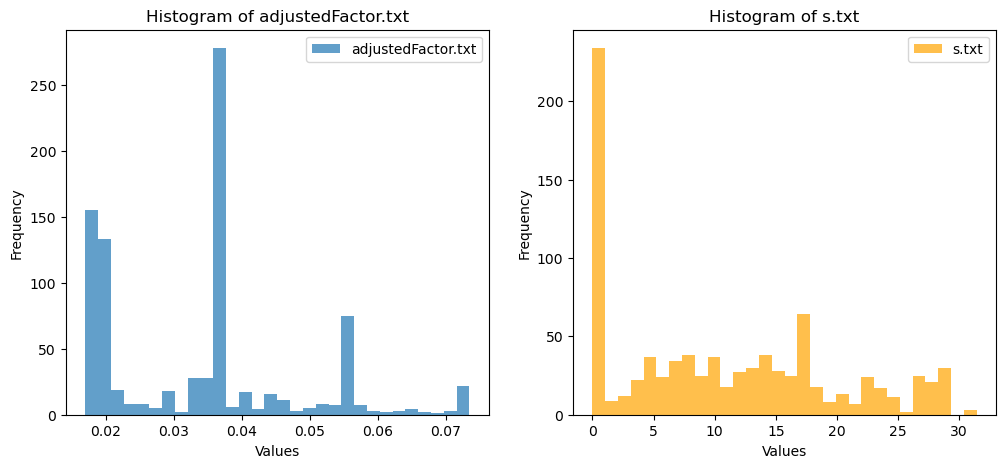

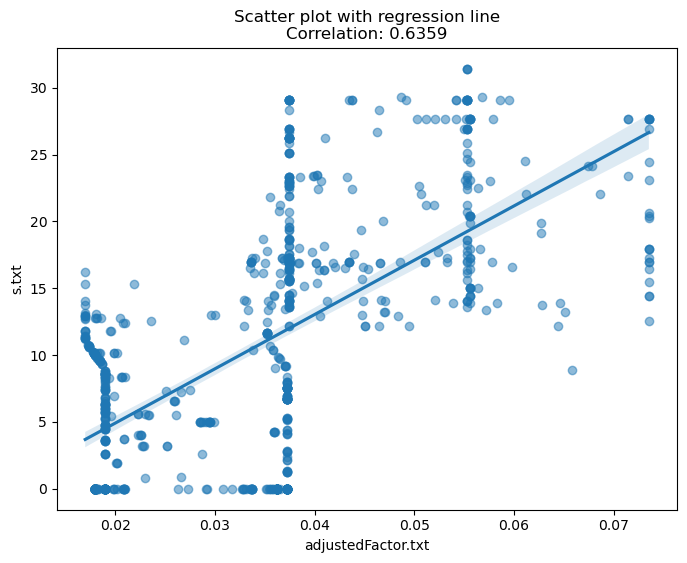

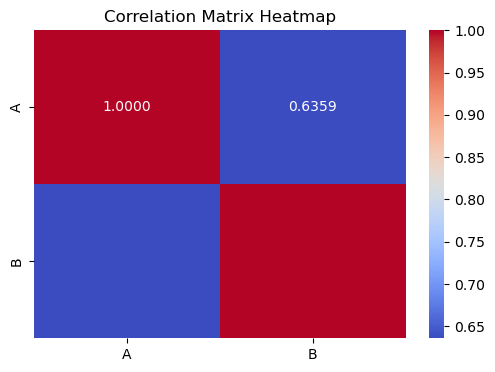

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일에서 소수 데이터를 불러오는 함수 정의
def load_data(filename):
    with open(filename, 'r') as file:
        data = file.readlines()
    # 각 줄에서 공백 제거하고 float 형으로 변환
    data = [float(line.strip()) for line in data]
    return data

# 파일 adjustedFactor.txt와 s.txt에서 소수 데이터를 불러오기
data_a = load_data('adjustedFactor.txt')
data_b = load_data('s.txt')

# 두 파일의 데이터 길이가 같은지 확인
if len(data_a) != len(data_b):
    print("Error: The files have different numbers of data points.")
else:
    # 데이터를 데이터프레임으로 만들기
    df = pd.DataFrame({'A': data_a, 'B': data_b})

    # 기초 통계 요약
    print("Descriptive Statistics:")
    print(df.describe())

    # 상관계수 계산
    correlation = df.corr().iloc[0, 1]
    print(f'\nThe correlation between adjustedFactor.txt and s.txt data is: {correlation}')

    # 시각화 1: 히스토그램 (각 데이터의 분포 확인)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(data_a, bins=30, alpha=0.7, label='adjustedFactor.txt')
    plt.title('Histogram of adjustedFactor.txt')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(data_b, bins=30, alpha=0.7, color='orange', label='s.txt')
    plt.title('Histogram of s.txt')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # 시각화 2: 산점도와 회귀선 (상관관계 시각화)
    plt.figure(figsize=(8, 6))
    sns.regplot(x='A', y='B', data=df, scatter_kws={'alpha':0.5})
    plt.title(f'Scatter plot with regression line\nCorrelation: {correlation:.4f}')
    plt.xlabel('adjustedFactor.txt')
    plt.ylabel('s.txt')
    plt.show()

    # 시각화 3: 상관관계 히트맵
    plt.figure(figsize=(6, 4))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".4f", cbar=True)
    plt.title('Correlation Matrix Heatmap')
    plt.show()
